### Overview Dataset

"Data Sensus Penghasilan". Data ini diambil dari database biro Sensus 1994 oleh Ronny Kohavi dan Barry Becker (Data Mining and Visualization, Silicon Graphics).

Data set ini berisikan beberapa kategori sebagai berikut
* age
* sex
* race
* education
* marital-status
* workclass
* occupation
* relationship
* native-country
* hours-per-week
* capital-loss
* capital-gain
* fnlwgt

# Exploratory Data Analysis (EDA)

Pada praktikum ini, Anda akan melihat beberapa contoh Exploratory Data Analysis (EDA) pada data set sensus penghasilan. 

* [Pengambilan Data](#1)
* [Univariate analysis](#2)
* [Bivariate analysis](#3)

# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat dan jelaskan univariate analysis untuk kategori hours-per-week dan income
2. Buat dan jelaskan Bivariate analysis untuk hubungan antara hours-per-week dan income


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 Age

### **i.	Distribusi**

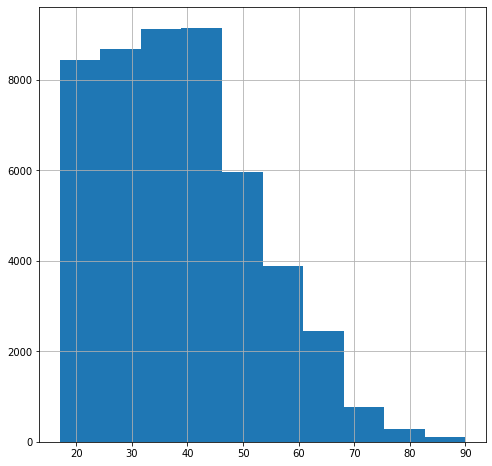

In [ ]:
data['age'].hist(figsize=(8,8))
plt.show()

In [ ]:
data[data["age"]>70].shape

(868, 15)

### **ii.	Deskripsi**
Histogram di atas menjelaskan bahwa :
*  atribut "usia" tidak simetris.
*  miring ke kanan (Tapi ini baik karena orang dewasa yang lebih muda mendapatkan upah bukan yang lebih tua)
*  Usia minimum dan maksimum orang adalah 17 dan 90 tahun.
*  Dataset ini memiliki lebih sedikit pengamatan (868) tentang usia orang setelah usia tertentu, yaitu 70 tahun.

## 2.1.2 Income

### **i. Distribusi**

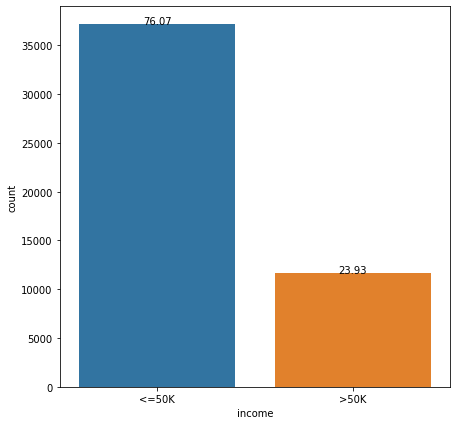

In [ ]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**
Distribusi di atas menjelaskan bahwa :
* **Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \\$50K) dan 76% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \\$50K).**

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 Age - income (Hubungan)

### i. **Boxplot**

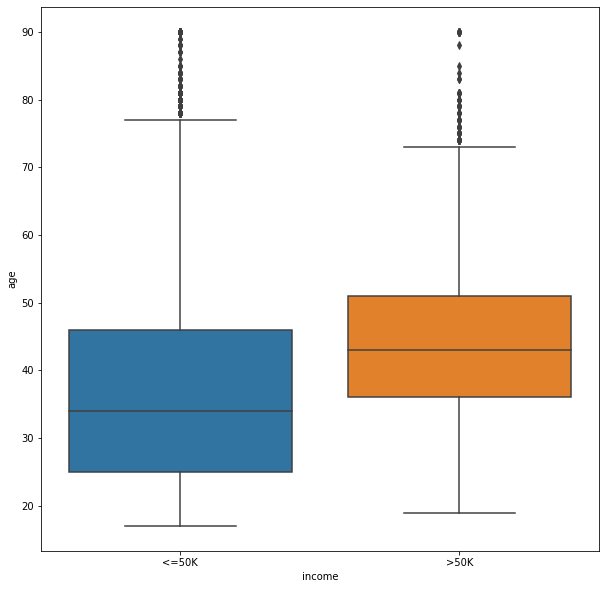

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [ ]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.275178
0,<=50K,36.872184


### ii. Deskripsi
Bivariate boxplot di atas menjelaskan bahwa :
* Rata-rata "usia" untuk kelompok Penghasilan (<= \\$50K) adalah 36,8 tahun. Dan untuk kelompok Penghasilan (> \\$50K) adalah 44,2 tahun
* Kelompok pendapatan(<=50K) memiliki median "usia"(34 tahun) lebih rendah daripada kelompok Pendapatan(>50K) yang memiliki median "usia"(42 tahun).

### iii. Uji Hipotesis (untuk menguji hubungan antara Age & Income )
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Contoh : apakah ada hubungan antara usia dan pendapatan?

Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [ ]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']=='<=50K']['age']
income_0 = data[data['income']=='>50K']['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -4.522346980129441
p value 1.1014567838186016e-05
null hypothesis ditolak


### iv. Kesimpulan akhir

Menggunakan analisis statistik,

    Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata usia kelompok berpenghasilan >50K dan kelompok berpenghasilan <=50K.
    Hal Ini membuktikan bahwa usia memiliki peranan dalam membedakan kelompok pendapatan.

# Tugas

##Nama: Rizky Bagaskara
## Kelas: 2IA01
## NPM: 51420127

## 1. Univariate analysis

## 1.1 hours-per-week

### **i.	Distribusi**

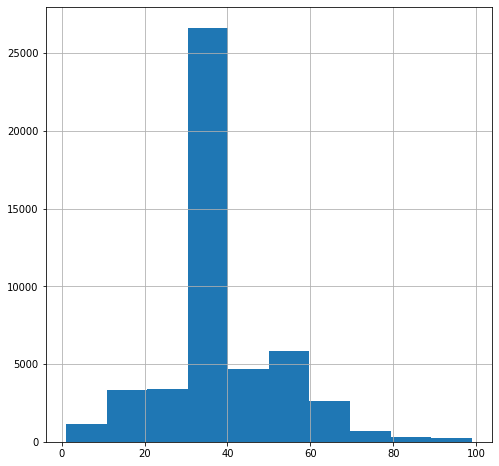

In [ ]:
# Buat diagram hours-per-week
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

In [ ]:
data[data["hours-per-week"]>70].shape

(1676, 15)

In [9]:
data['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

### **ii. Deskripsi**


In [ ]:
# Jelaskan hasil diagram tersebut

Histogram di atas menjelaskan:



*   Atribut hours-per-week tidak simetris karena dari bagian kiri ke bagian kanan bentuknya tidak saling mencerminkan satu sama lain.
*   Persebaran jam kerja pada histogram di atas tidak stabil karena rata-rata orang lebih banyak bekerja pada kisaran 30-40 jam perminggu dibandingkan waktu lain.
*   Hours-per-week memiliki data minimum sebesar 1 dan data maksimum sebesar 99.
*   Dataset ini memiliki cukup banyak pengamatan (1676) tentang seberapa banyak kerja orang per minggunya setelah total jam tertentu, yaitu 60 jam perminggu.







## 1.2 Income

### **i.	Distribusi**

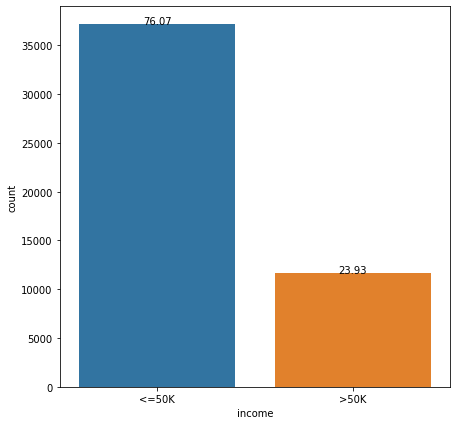

In [ ]:
# Buat diagram income
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Deskripsi**

In [ ]:
# Jelaskan hasil diagram tersebut

Distribusi di atas menjelaskan bahwa :

Dataset ini tidak seimbang, yaitu 23,93% di antaranya termasuk dalam kelompok pendapatan 1 (yang berpenghasilan lebih dari \$50K) dan 76.07% termasuk dalam kelompok pendapatan 0 (yang berpenghasilan kurang dari \$50K).

# 2. Bivariate analysis

## 2.1 hours-per-week - income (Hubungan)

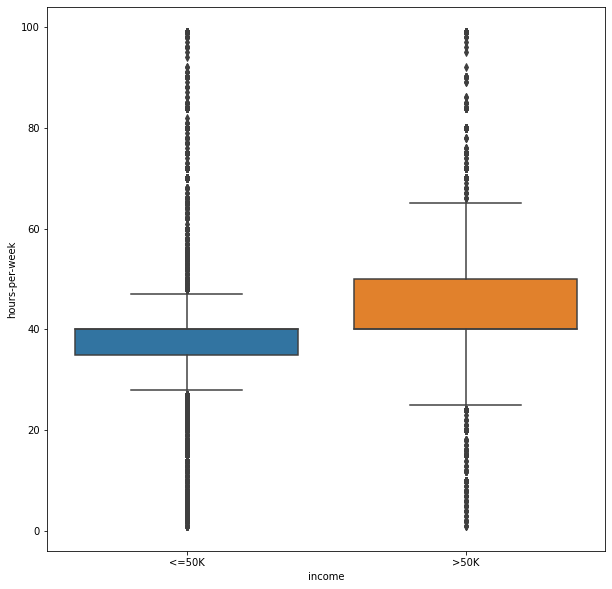

In [ ]:
# Buat diagram, hubungan hours-per-week dengan income
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

Mean

In [ ]:
data[['income', 'hours-per-week']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,>50K,45.452896
0,<=50K,38.840048


Median

In [ ]:
data[['income', 'hours-per-week']].groupby(['income'], as_index=False).median().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
0,<=50K,40.0
1,>50K,40.0


### ii. Deskripsi

   

In [ ]:
# jelaskan hasil diagram tersebut

Bivariate boxplot di atas menjelaskan bahwa :
*   Rata-rata "jam kerja" untuk kelompok Penghasilan (<= \$50K) adalah 38,8 jam per minggu, sedangkan  untuk kelompok Penghasilan (> \$50K) adalah 45,4 jam per minggu. 
*   Baik Kelompok pendapatan <=50K dan >50k memiliki median "hours-per-week" yang sama yaitu sebesar 40 jam.


### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & Income )
Dalam contoh ini kita dapat mengatakan bahwa:

    Null Hypothesis :- tidak ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.
    Alternate Hypothesis :- ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [ ]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random

data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['income']=='<=50K']['hours-per-week']
income_0 = data[data['income']=='>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [ ]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -4.69103659051657
p value 5.183465049287629e-06
null hypothesis ditolak


### iv. Kesimpulan akhir


In [ ]:
# Berikan kesimpulan

Dapat disimpulkan bahwa terdapat perbedaan yang signifikan pada rerata "hours-per-week" antara kelompok dengan penghasilan >50k dan kelompok yang berpenghasilan <=50k. Hal ini dibuktikan dengan ditolaknya hipotesis null.

Berarti, dapat dibuktikan bahwa "hours-per-week" memiliki peranan dalam membedakan kelompok pendapatan.